**Library Imports**

In [1]:
# Library imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore") # Hide all warning messages, dropped in after completing EDA.

**Introduction.**

The data set used is the winter fashion Trends from kaggle. With this Notebook, I will clean & process the data for EDA and identify potential patterns to support ML. The target (prediction variable) on which correlation is going to be tested is the Trending status.

# Importing data

Importing and simple exploration and aggreagation of importated data.

In [2]:
# Data import
df = pd.read_csv('/kaggle/input/winter-fashoin-trends/Winter_Fashion_Trends_Dataset.csv')
print(df.shape)
print(df.describe())

print(df.dtypes)

(150, 12)
               ID  Price(USD)  Popularity_Score  Customer_Rating
count  150.000000  150.000000        150.000000       150.000000
mean    75.500000  443.105933          5.763333         3.802667
std     43.445368  211.630074          2.655763         0.719428
min      1.000000   30.070000          1.100000         2.500000
25%     38.250000  292.807500          3.400000         3.125000
50%     75.500000  445.820000          5.850000         3.800000
75%    112.750000  631.537500          8.225000         4.400000
max    150.000000  788.030000         10.000000         5.000000
ID                    int64
Brand                object
Category             object
Color                object
Material             object
Style                object
Gender               object
Season               object
Price(USD)          float64
Popularity_Score    float64
Customer_Rating     float64
Trend_Status         object
dtype: object


***Findings 1:***
The data set contains 150 entries and 12 variables, 4 of which are numerical and the rest categorical (of the 4, one is ID, which I will remove in favour of the index).

Aggregating the numerical variables shows relatively clean distribution of the variable datas around their means meaning no outliers to deal with.

**Data cleaning and prep**

For this dataset, the only preparation going to be done is dropping the irrelevant data, missing values if any, and separation for analysis.

In [3]:
# Dropping the ID column which is irrelevant as we have an index.
df = df[[#'ID', 
    'Brand', 'Category', 'Color', 'Material', 'Style', 'Gender', 
         'Season', 'Price(USD)', 'Popularity_Score', 'Customer_Rating',
         'Trend_Status']].copy()

df.columns

Index(['Brand', 'Category', 'Color', 'Material', 'Style', 'Gender', 'Season',
       'Price(USD)', 'Popularity_Score', 'Customer_Rating', 'Trend_Status'],
      dtype='object')

In [4]:
# Checking for missing values
df.isnull().sum()

Brand               0
Category            0
Color               0
Material            0
Style               0
Gender              0
Season              0
Price(USD)          0
Popularity_Score    0
Customer_Rating     0
Trend_Status        0
dtype: int64

In [5]:
#checking for duplicated values
df.loc[df.duplicated()]

,Brand,Category,Color,Material,Style,Gender,Season,Price(USD),Popularity_Score,Customer_Rating,Trend_Status


In [6]:
#Checking for duplicates with a combination of categotical variable
df[['Brand', 'Category', 'Color', 'Material', 'Style', 'Gender', 
         'Season']].loc[df[['Brand', 'Category', 'Color', 'Material', 'Style', 'Gender', 
         'Season']].duplicated()]

,Brand,Category,Color,Material,Style,Gender,Season


***Findings 2:***
All data is present, no need for handling missing data and similarly, all entries are unique and not duplicated.

In [7]:
df.head()

,Brand,Category,Color,Material,Style,Gender,Season,Price(USD),Popularity_Score,Customer_Rating,Trend_Status
0,Adidas,Gloves,Brown,Polyester,Streetwear,Women,Winter 2025,244.06,6.0,4.9,Trending
1,Gucci,Gloves,Red,Leather,Sporty,Men,Winter 2023,366.73,8.8,3.3,Trending
2,H&M,Coat,Brown,Fleece,Streetwear,Unisex,Winter 2025,741.55,4.8,3.5,Trending
3,North Face,Coat,Blue,Cashmere,Formal,Men,Winter 2024,116.09,7.5,3.1,Outdated
4,Mango,Thermal,Blue,Cashmere,Formal,Unisex,Winter 2025,193.16,7.8,4.3,Outdated


In [8]:
# Split into cateogical and numerical using dtypes.
#numerical_df = df.select_dtypes(include=[np.number])
#categorical_df = df.select_dtypes(exclude=[np.number])

# EDA

# *Desciptive statistics* (Numerical)

In [9]:
df.describe()

,Price(USD),Popularity_Score,Customer_Rating
count,150.000000,150.000000,150.000000
mean,443.105933,5.763333,3.802667
std,211.630074,2.655763,0.719428
min,30.070000,1.100000,2.500000
25%,292.807500,3.400000,3.125000
50%,445.820000,5.850000,3.800000
75%,631.537500,8.225000,4.400000
max,788.030000,10.000000,5.000000


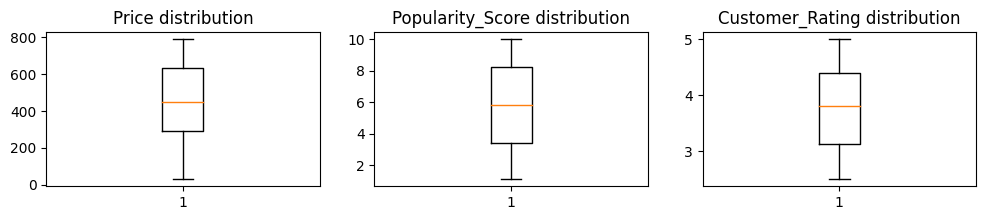

In [10]:
plt.figure(figsize=(12,2))
plt.subplot(1,3,1)
plt.boxplot(df['Price(USD)'])
plt.title("Price distribution")

plt.subplot(1,3,2)
plt.boxplot(df['Popularity_Score'])
plt.title("Popularity_Score distribution")

plt.subplot(1,3,3)
plt.boxplot(df['Customer_Rating'])
plt.title("Customer_Rating distribution")
plt.show()

***Finding 3:***
All three variables are fairly well distributed with not outlier. The minimum price is slightly further from the mean but acceptable. 

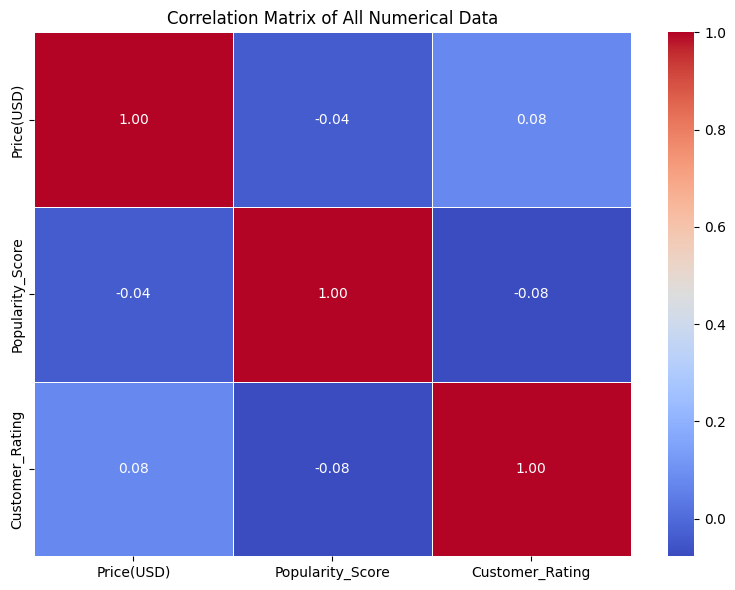

In [11]:
#Correlation matrix of numerical variables
cor_mtx_numerical = df.select_dtypes(include=[np.number]).corr()

# Correlation heatmap.
plt.figure(figsize=(8, 6))
sns.heatmap(cor_mtx_numerical, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of All Numerical Data')

plt.tight_layout()
plt.show()

***Trend status vs numerical variables***

***Findings 4:***
There is a very no significant correlation between the numerical variables; i.e. Popularity score, price and customer are independent of each other.

For further investigation required.

In [12]:
price_meaned = df.groupby('Trend_Status')['Price(USD)'].mean()
ps_meaned = df.groupby('Trend_Status')['Popularity_Score'].mean()
cr_meaned = df.groupby('Trend_Status')['Customer_Rating'].mean()

print(price_meaned)
print(ps_meaned)
print(cr_meaned)

Trend_Status
Classic     383.267857
Emerging    449.759667
Outdated    442.018200
Trending    479.540238
Name: Price(USD), dtype: float64
Trend_Status
Classic     5.042857
Emerging    5.910000
Outdated    6.164000
Trending    5.661905
Name: Popularity_Score, dtype: float64
Trend_Status
Classic     3.689286
Emerging    3.676667
Outdated    3.836000
Trending    3.928571
Name: Customer_Rating, dtype: float64


***Findings 5:***
* As one would expect, on average trending garmets are the most priced followed by emerging (soon to trend), outdated (outgoing trend) and finally classics (that trended before).
* Outdated garmets are score more, mostlikely because they have had more reach in the populations, suprisingly followed by emerging (probably because they are being promoted more at the time), then trending and calssic gramets follow.
* Customers rate trending clothes highest and emerging the lowest.

# ***Exploring categrical variables***

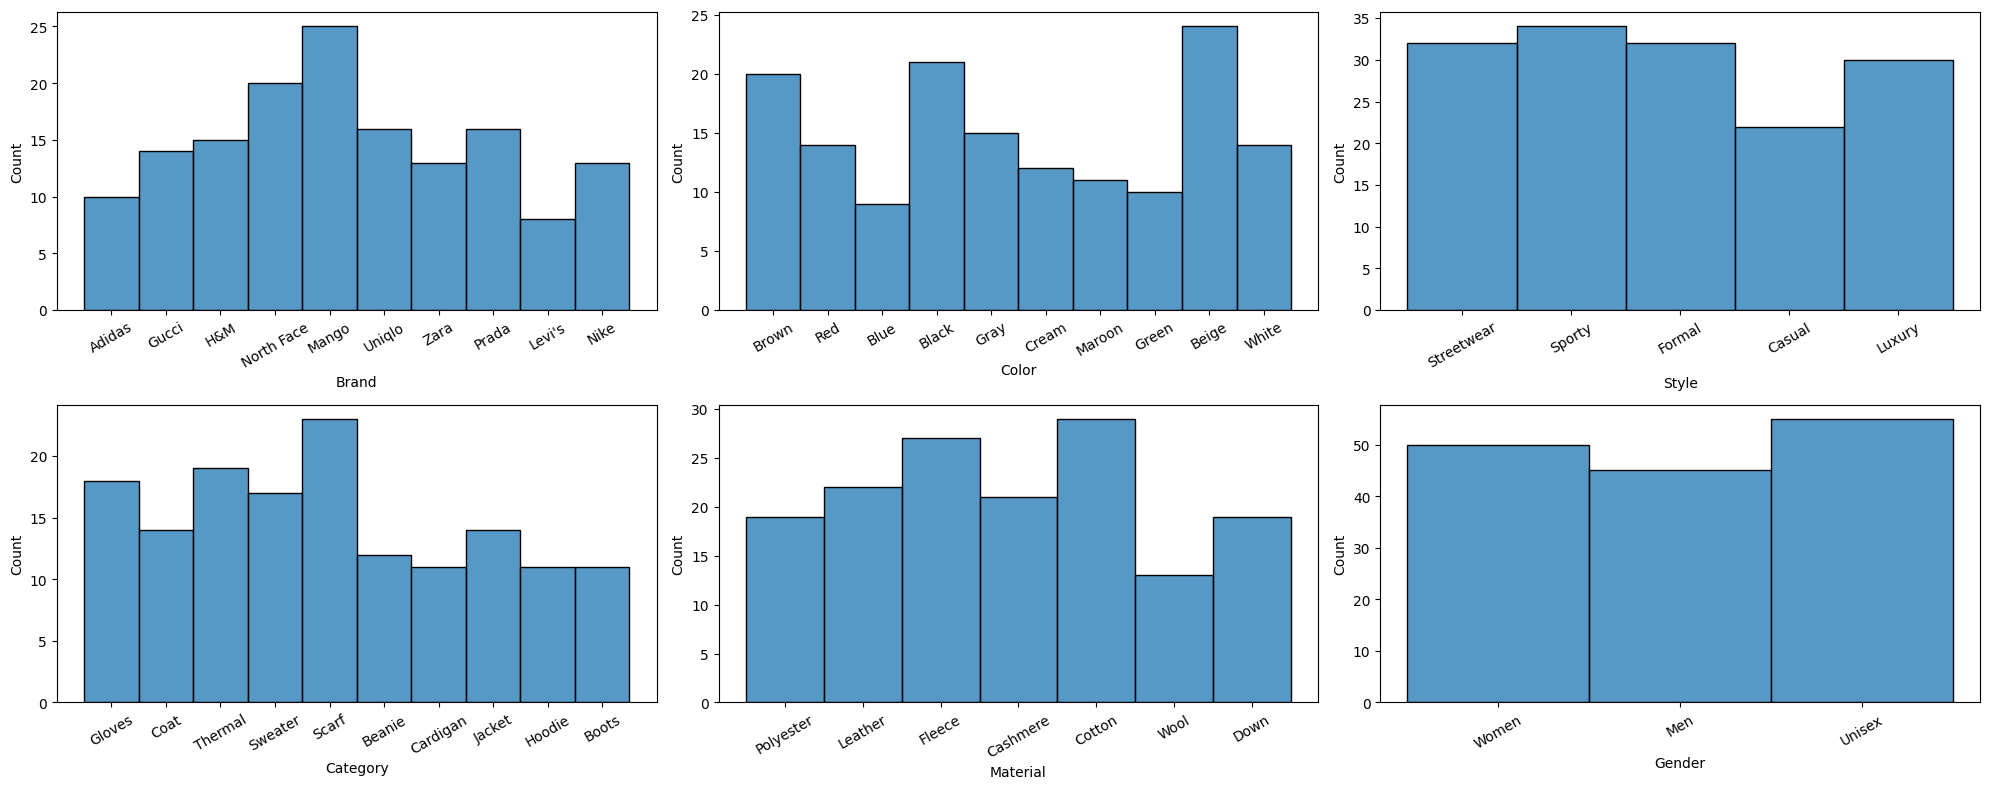

In [13]:
plt.figure(figsize = (20,8))

#Distribution of categorical data
plt.subplot(2,3,1)
sns.histplot(x= 'Brand', data = df)
plt.xticks(rotation=30)

plt.subplot(2,3,2)
sns.histplot(x= 'Color', data = df)
plt.xticks(rotation=30)

plt.subplot(2,3,3)
sns.histplot(x= 'Style', data = df)
plt.xticks(rotation=30)

plt.subplot(2,3,4)
sns.histplot(x= 'Category', data = df)
plt.xticks(rotation=30)

plt.subplot(2,3,5)
sns.histplot(x= 'Material', data = df)
plt.xticks(rotation=30)

plt.subplot(2,3,6)
sns.histplot(x= 'Gender', data = df)
plt.xticks(rotation=30)

plt.tight_layout()
plt.show()

***Findings 6:***
* North Face is the most purchased brand followed by H&M and Levi's is the least warn. 
* Beige is the most purchased color and blue is the least purchased.
* Sporty styled clothes are most purchased, followed closely by streetwear, formal and luxury.
* Cotton is the most purchased.

*Are these characteristics linked to price? or nay other variable.*
* Scarfs are the most purchased option in winter (probably because is it mostly unisex, recommend a hypothesis test) 
* As expected, unisex garmets are purchased most.

In [14]:
mean_brand_price = df.groupby('Brand')['Price(USD)'].mean()
mean_color_price = df.groupby('Color')['Price(USD)'].mean()
mean_style_price = df.groupby('Style')['Price(USD)'].mean()
mean_material_price = df.groupby('Material')['Price(USD)'].mean()

print(mean_brand_price)
print(mean_color_price)
print(mean_style_price)
print(mean_material_price)

Brand
Adidas        565.399000
Gucci         458.994286
H&M           443.940000
Levi's        459.953750
Mango         440.217600
Nike          373.648462
North Face    368.169000
Prada         437.876250
Uniqlo        536.190625
Zara          402.763846
Name: Price(USD), dtype: float64
Color
Beige     477.742500
Black     453.995238
Blue      346.806667
Brown     434.426000
Cream     519.098333
Gray      418.522000
Green     406.444000
Maroon    419.786364
Red       428.600000
White     461.920714
Name: Price(USD), dtype: float64
Style
Casual        380.967727
Formal        449.457187
Luxury        438.740000
Sporty        521.567059
Streetwear    400.202812
Name: Price(USD), dtype: float64
Material
Cashmere     401.701429
Cotton       420.819310
Down         476.270526
Fleece       452.308889
Leather      536.483636
Polyester    391.000000
Wool         410.252308
Name: Price(USD), dtype: float64


***Findings 7:***
* Purchase of brands may be influenced by the price to some extent, North Face which is the most purchased is of the least price, however Nike and Zara which follow in pricing have lower purchases than brands that are more expensive on average.
* Style and color are not affected by price, the assumprion may be that customers have specific preferences.
* The same can be said about cotton and price, leaving the facts that cotton clothes are warmer and easier to clean than other alternatives as the only logical explanation for its high purchase rate.

***Trend status vs categorical variables***

In [15]:
#Pivoting categorical variables with Trend Status
crosstab1 = pd.crosstab(df.Trend_Status, df.Brand)
crosstab2 = pd.crosstab(df.Trend_Status, df.Color)
crosstab3 = pd.crosstab(df.Trend_Status, df.Style)

crosstab1
#print(crosstab2)
#print(crosstab3)

Brand,Adidas,Gucci,H&M,Levi's,Mango,Nike,North Face,Prada,Uniqlo,Zara
Trend_Status,,,,,,,,,,
Classic,1,3,0,3,7,2,5,2,4,1
Emerging,3,2,2,0,4,3,7,6,0,3
Outdated,2,6,4,3,11,4,6,4,6,4
Trending,4,3,9,2,3,4,2,4,6,5


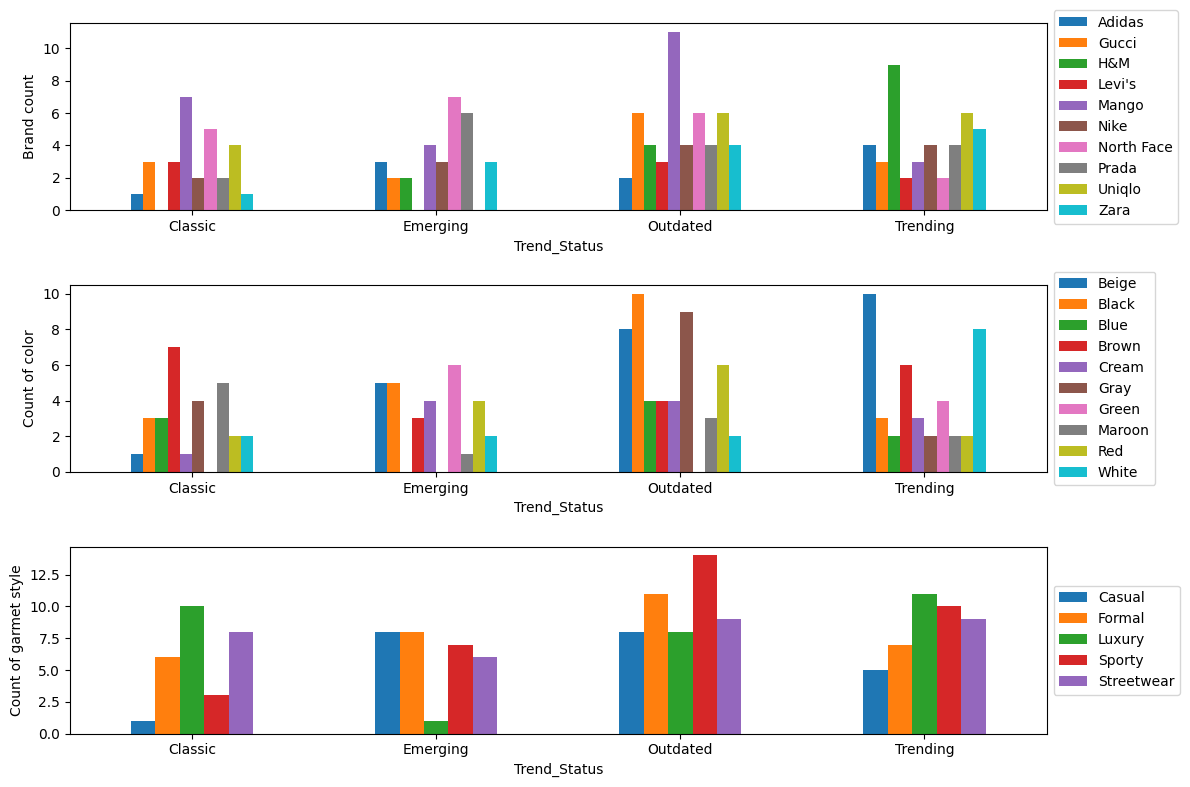

In [16]:
#Charting the cross tables
plt.figure(figsize=(12,8))
plt.subplot(3,1,1)
crosstab1.plot(kind='bar', stacked=False, rot=0, ax=plt.gca(), legend = False)
plt.ylabel("Brand count")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.subplot(3,1,2)
crosstab2.plot(kind='bar', stacked=False, rot=0, ax=plt.gca(), legend = True)
plt.ylabel("Count of color")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.subplot(3,1,3)
crosstab3.plot(kind='bar', stacked=False, rot=0, ax=plt.gca(), legend = True)
plt.ylabel("Count of garmet style")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

***Findings 8:***
1. Trend status and brand product
   * Mango has more outdated and classic products than any other brand meaning they held the market previously.
   *  H&M is the most trending brand but have no classics and only a few outdated, which could point to their being new in the market. They also have few emerging products meaning they wont be holding the market for long.
   *  North face products are the most emerging followed closely by prada and although they have very few trending, they have had a good percentage of the market for a while.

2. Trend status and color
    * Beige garmets are the most trending but a relatively large margin.
    * Green garmets are emerging most; however it is not far from black and beige.
    * Black and grey are mostly outdated.
    * Brown garmets are mostly classic.

3. Trend status and style

   * Luxury garmets are trending the most, followed closely by sporty and street wear.
   * There is also a large number of outated sporty wear.
   * Casual and formal garmets are the most emrging styles.
   * Sporty garmets are the most outdated and luxury are the most classic.

Note: Emerging clothes are mostly full of uncertainy as the promotion and advertising is being done to push products.

# *Time series.*
***Categorical variables over time***

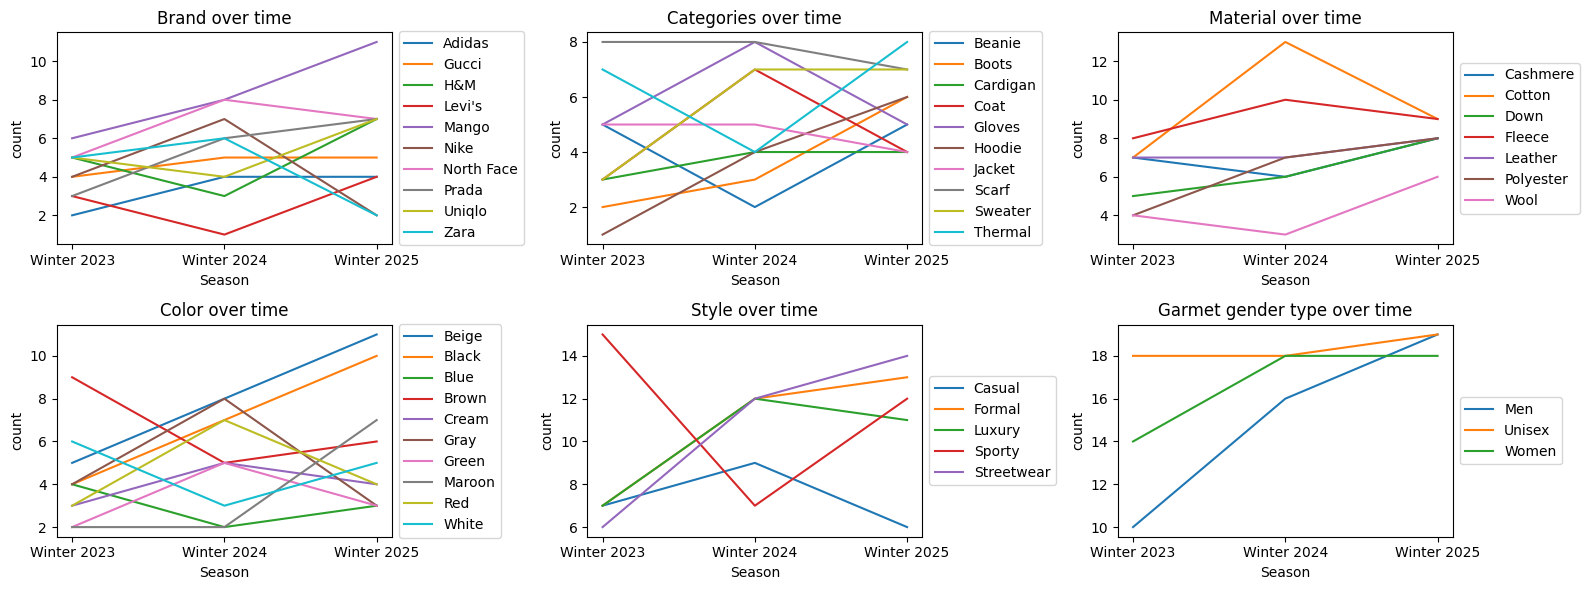

In [17]:
df.head()
plt.figure(figsize=(16,6))
#season by Brand
plt.subplot(2,3,1)
style_counts1 = df.groupby(["Season", "Brand"]).size().reset_index(name="count")
sns.lineplot(data=style_counts1,x="Season",y="count",hue="Brand")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Brand over time")
#season by Category
plt.subplot(2,3,2)
style_counts2 = df.groupby(["Season", "Category"]).size().reset_index(name="count")
sns.lineplot(data=style_counts2,x="Season",y="count",hue="Category")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Categories over time")
#season by material
plt.subplot(2,3,3)
style_counts3 = df.groupby(["Season", "Material"]).size().reset_index(name="count")
sns.lineplot(data=style_counts3,x="Season",y="count",hue="Material")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Material over time")
#season by color
plt.subplot(2,3,4)
style_counts4 = df.groupby(["Season", "Color"]).size().reset_index(name="count")
sns.lineplot(data=style_counts4,x="Season",y="count",hue="Color")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Color over time")
#season by Style
plt.subplot(2,3,5)
style_counts5 = df.groupby(["Season", "Style"]).size().reset_index(name="count")
sns.lineplot(data=style_counts5,x="Season",y="count",hue="Style")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Style over time")
#season by Gender
plt.subplot(2,3,6)
style_counts6 = df.groupby(["Season", "Gender"]).size().reset_index(name="count")
sns.lineplot(data=style_counts6,x="Season",y="count",hue="Gender")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Garmet gender type over time")

plt.tight_layout()
plt.show()

***Findings 9a: Overtime changes***

 **Brands:** Mango, adidas and Prada products have had overall rise together in product output alongside gucci and Levi's that had a drop in the einter of 2024, the rest of the brands had drops.
 
 **Categories:** Hoodies, boots and sweeters have had significantly increase in numbers than other categories, with consistent updraft. Cardigans have also had a rise but flattened out in 2024 - 2025 like most other brands that had drops in the same period. Thermal and Beanies started of well in 2023 and plunged in 2024 and tried to make recoveries i the winter of 2025. 

 **Materials:** Much as cotton is trending highly, its numbers were took a dive from 2024 - 2025 winters; Wool, Polyester, Down, Cashmere and leather ended better than they started in 2023. Like cotton, fleece also plunged in 2025 as compare to 2024 but still performed better than 2023.

**Color:** Beige and black have had a consistent ride in numbers unlike other colors of garmets than have either had a rise and drop (Green, cream, red,gray) or dropped and rose(Brown,white, blue).

**Styles:** While the rest of the style started at the bottom and by 2025 were doing better, Sporty and casual garmets dropped in number by 2025. However, the drop in sporty garmets was significantly large from 2023 to 2024 and though it reecovered, did not come close to the where it stated.

**Gender:** Unisex winter garmets have always had high numbers than both male and female, and continue to rise; Male and female winter garmets have also increased in number in the last two years.

***Conclusion:*** Winter of 2024 had alot of uncertainity which need to be investigated further.

***Numerical variables over time***

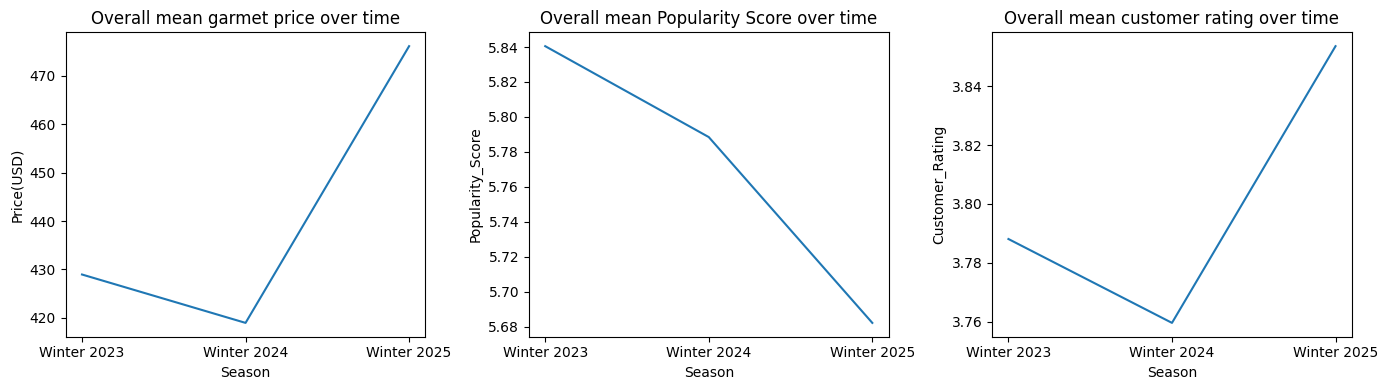

In [18]:
df.head()
plt.figure(figsize=(14,4))
#Price average by season
plt.subplot(1,3,1)
style_counts7 = df.groupby('Season')['Price(USD)'].mean()
sns.lineplot(data=style_counts7)
plt.title("Overall mean garmet price over time")
#Popularity Score by season
plt.subplot(1,3,2)
style_counts8 = df.groupby('Season')['Popularity_Score'].mean()
sns.lineplot(data=style_counts8)
plt.title("Overall mean Popularity Score over time")
#Customer rating
plt.subplot(1,3,3)
style_counts9 = df.groupby('Season')['Customer_Rating'].mean()
sns.lineplot(data=style_counts9)
plt.title("Overall mean customer rating over time")
plt.tight_layout()
plt.show()

***Findings 9b: Overtime changes***

Although not much insight can be taken from the popularity score and customer rating averages, the mean prices seems to show a significant increase in the prices of garmets in winter 2025 and a plunge that had taken place in 2024; perhaps this plunge would explain the drops and rises in several factors of the categorical variables in the same period such as increase in luxury garmets or cotton.

Custormer rating followed the same pattern as price, hinting at a relationship that was earier unseen in the correlation matrix(needs more exploring).



***Test hypotheses from component analysis.***

**1. Customer rating is dependant on price.**

**2. Popularity score is dependant on price.**

**3. Customer rating and popularity score are independent.**

# Conclusions